<a href="https://colab.research.google.com/github/Lapasrada-p/BrainTumorMRI/blob/main/BrainTumor_MRI_kanyanatthawee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Read file csv from google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Dataset

In [1]:
! pip install -q kaggle

In [2]:
%reset -f

from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lapasradakumjulla","key":"09c225811ed9ea9812d4ff52b118e2e1"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

100% 148M/149M [00:04<00:00, 37.4MB/s]
100% 149M/149M [00:04<00:00, 32.3MB/s]


In [8]:
! unzip brain-tumor-mri-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

# Split data

In [9]:
import os
import numpy as np
import shutil

In [10]:
root_dir = 'dataset'
classes = ['glioma', 'meningioma', 'notumor', 'pituitary']

for cls in classes:
  os.makedirs(root_dir +'/val/' + cls)
  os.makedirs(root_dir +'/test/' + cls)
  os.makedirs(root_dir +'/train/'+cls)

In [11]:
#load dataset for test dataset and valid dataset
def loadDataset(currentCls):
  src = "Testing/"+currentCls 

  val_ratio = 0.3
  test_ratio = 0.7

  allFileNames = os.listdir(src)
  np.random.shuffle(allFileNames)
  val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                           [int(len(allFileNames)*(1 - test_ratio))])

  val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
  test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]

  print('Total images: ', len(allFileNames))
  print('Validation: ', len(val_FileNames))
  print('Testing: ', len(test_FileNames))

  for name in val_FileNames:
      shutil.copy(name, "dataset/val/"+currentCls)

  for name in test_FileNames:
      shutil.copy(name, "dataset/test/"+currentCls)

In [12]:
# loadDataset for train data
def loadDataset_Train(cls):
  src = "Training/"+cls 
  allFileNames = os.listdir(src)

  allFileNames = os.listdir(src)
  np.random.shuffle(allFileNames)
  train_FileNames, keep = np.split(np.array(allFileNames),
                                   [int(len(allFileNames))])

  train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]

  print('Total images: ', len(allFileNames))
  print('Training: ', len(train_FileNames))

  for name in train_FileNames:
      shutil.copy(name, "dataset/train/"+cls)

In [13]:
loadDataset('glioma') 
loadDataset_Train('glioma')
loadDataset('meningioma')
loadDataset_Train('meningioma')
loadDataset('notumor')
loadDataset_Train('notumor')
loadDataset('pituitary')
loadDataset_Train('pituitary')

Total images:  300
Validation:  90
Testing:  210
Total images:  1321
Training:  1321
Total images:  306
Validation:  91
Testing:  215
Total images:  1339
Training:  1339
Total images:  405
Validation:  121
Testing:  284
Total images:  1595
Training:  1595
Total images:  300
Validation:  90
Testing:  210
Total images:  1457
Training:  1457


# Show Image

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [15]:
dir1 = ('dataset/train')
category = []

for file in os.listdir(dir1):
    category.append(file)
    
for i in category:
    file_path = os.path.join(dir1,i)
    
for file in os.listdir(file_path):
      img_path = os.path.join(file_path,file)
      image = cv2.imread(img_path)

(512, 512, 3)


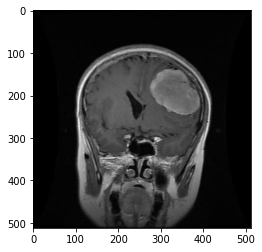

In [16]:
plt.imshow(image)
print(image.shape)

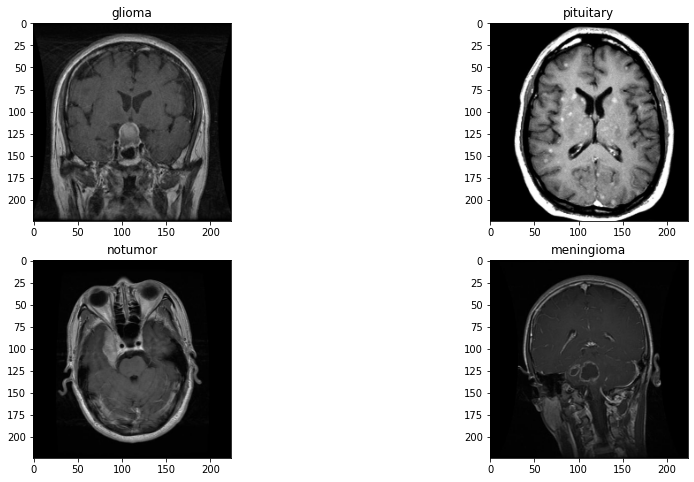

In [17]:
plt.figure(figsize=(15,8))

img_path = ['/pituitary/Tr-piTr_0003.jpg','/notumor/Tr-noTr_0003.jpg','/meningioma/Tr-meTr_0003.jpg','/glioma/Tr-glTr_0003.jpg']

for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    img = cv2.imread(dir1 + img_path[i])
    img = cv2.resize(img, (224, 224))
    plt.imshow(img)
    plt.title(category[i])

# Data Preparation

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
batch_size = 64
img_rows, img_cols = 512, 512

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='dataset/train',
    labels='inferred',  #ให้ชื่อแต่ละ labels เป็นไปตาม folder ที่เป็น class ของแต่ละประเภทของรูปภาพ
    label_mode='categorical',  #ข้อมูลที่จัดเป็นกลุ่ม
    batch_size=batch_size,
    image_size=(img_rows, img_cols))

val_ds = keras.utils.image_dataset_from_directory(
    directory='dataset/val',
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=(img_rows, img_cols))

test_ds = keras.utils.image_dataset_from_directory(
    directory='dataset/test',
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=(img_rows, img_cols))

Found 5712 files belonging to 4 classes.
Found 392 files belonging to 4 classes.
Found 919 files belonging to 4 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['glioma', 'meningioma', 'notumor', 'pituitary']


# Create Model

In [ ]:
from tensorflow.keras import models,layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.activations import relu,softmax
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import load_img, img_to_array 
from tensorflow.keras.models import load_model
Adam = tf.keras.optimizers.Adam
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd

In [ ]:
#fuction for calling to use metrics accuracy,precision_m, recall_m , f1_m

import keras.backend as K
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
model4 = tf.keras.models.Sequential()

# Preprocessing  -แปลงค่าของชุดข้อมูลภาพให้อยู่ในช่วง 0 ถึง 1
model4.add(keras.Input(shape = (512, 512 , 3)))
model4.add(layers.Resizing(height=256, width=256, interpolation='bilinear'))
model4.add(layers.Rescaling(scale=1./255))

# Data Augmentation -แก้ปัญหาoverfitting
model4.add(layers.RandomFlip(mode='horizontal_and_vertical'))
model4.add(layers.RandomRotation(factor=.2))

#1 CNN layer
model4.add(layers.Conv2D(filters=128, kernel_size = (3,3)))
model4.add(layers.Activation("relu"))

#2 CNN layer
model4.add(layers.Conv2D(filters=64, kernel_size = (3,3)))
model4.add(layers.Activation("relu"))
model4.add(layers.MaxPool2D(pool_size=(2,2)))

#3 CNN layer
model4.add(layers.Conv2D(filters=32, kernel_size = (3,3)))
model4.add(layers.Activation("relu"))

#4 CNN layer
model4.add(layers.Conv2D(filters=64, kernel_size = (3,3)))
model4.add(layers.Activation("relu"))
model4.add(layers.MaxPool2D(pool_size=(2,2)))

# fully connected layer

# model4.add(layers.Dense(64))
# model4.add(layers.Activation("relu"))
# model4.add(layers.Dense(32))
# model4.add(layers.Activation("relu"))

#output layer
model4.add(layers.Flatten())
model4.add(layers.Dense(4))
model4.add(layers.Activation('softmax'))

In [ ]:
model4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_1 (Resizing)       (None, 256, 256, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 random_flip_1 (RandomFlip)  (None, 256, 256, 3)       0         
                                                                 
 random_rotation_1 (RandomRo  (None, 256, 256, 3)      0         
 tation)                                                         
                                                                 
 conv2d_4 (Conv2D)           (None, 254, 254, 128)     3584      
                                                                 
 activation_5 (Activation)   (None, 254, 254, 128)     0         
                                                      

In [ ]:
#use metrics accuracy

# optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
# model4.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# history4 = model4.fit(train_ds, 
#                     epochs=100,
#                     validation_data=val_ds)

In [ ]:
# history4 = model4.fit(train_ds, epochs=100, validation_data=val_ds)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model4.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy' , precision_m, recall_m , f1_m])

In [ ]:
history4 = model4.fit(train_ds, epochs=100, batch_size=128 , validation_data=val_ds)

Epoch 1/100
90/90 [==============================] - 100s 952ms/step - loss: 0.9864 - accuracy: 0.5865 - precision_m: 0.6544 - recall_m: 0.4269 - f1_m: 0.5043 - val_loss: 0.8395 - val_accuracy: 0.6633 - val_precision_m: 0.7032 - val_recall_m: 0.5603 - val_f1_m: 0.6227
Epoch 2/100
90/90 [==============================] - 82s 905ms/step - loss: 0.7319 - accuracy: 0.7183 - precision_m: 0.7808 - recall_m: 0.6408 - f1_m: 0.7029 - val_loss: 0.7620 - val_accuracy: 0.7372 - val_precision_m: 0.7750 - val_recall_m: 0.7143 - val_f1_m: 0.7427
Epoch 3/100
90/90 [==============================] - 82s 903ms/step - loss: 0.6150 - accuracy: 0.7631 - precision_m: 0.8000 - recall_m: 0.7172 - f1_m: 0.7560 - val_loss: 0.7591 - val_accuracy: 0.7245 - val_precision_m: 0.7364 - val_recall_m: 0.6741 - val_f1_m: 0.7032
Epoch 4/100
90/90 [==============================] - 82s 906ms/step - loss: 0.5827 - accuracy: 0.7827 - precision_m: 0.8150 - recall_m: 0.7366 - f1_m: 0.7734 - val_loss: 0.6643 - val_accuracy: 0.

In [ ]:
loss,accuracy,precision,recall,f1 = model4.evaluate(test_ds)
print('Model from Kaggle ')
print('loss : ', loss)
print('accuracy : ', accuracy)
print('precision : ', precision)
print('recall : ',recall)
print('f1 : ', f1)

15/15 [==============================] - 6s 361ms/step - loss: 0.1284 - accuracy: 0.9597 - precision_m: 0.9625 - recall_m: 0.9615 - f1_m: 0.9620
Model from Kaggle 
loss :  0.12837333977222443
accuracy :  0.9597388505935669
precision :  0.9624669551849365
recall :  0.9614583253860474
f1 :  0.961958646774292


In [ ]:
model4.save_weights("BrainTumorMRI-model_weight-4.h5")
model4.save("BrainTumorMRI-model-4.h5")

In [ ]:
#load model

loaded_model4 = load_model("BrainTumorMRI-model-4.h5", custom_objects={"recall_m": recall_m, "precision_m":precision_m, "f1_m":f1_m})
model4 = loaded_model4
model4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_1 (Resizing)       (None, 256, 256, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 random_flip_1 (RandomFlip)  (None, 256, 256, 3)       0         
                                                                 
 random_rotation_1 (RandomRo  (None, 256, 256, 3)      0         
 tation)                                                         
                                                                 
 conv2d_4 (Conv2D)           (None, 254, 254, 128)     3584      
                                                                 
 activation_5 (Activation)   (None, 254, 254, 128)     0         
                                                      

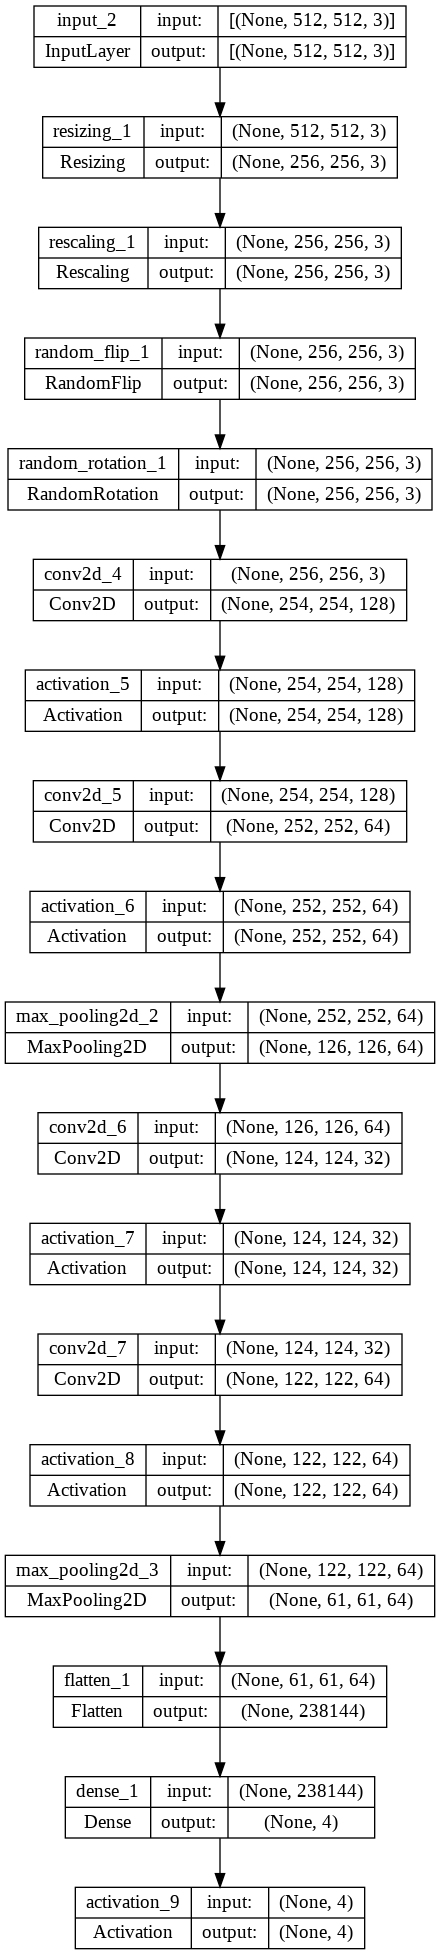

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model4, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

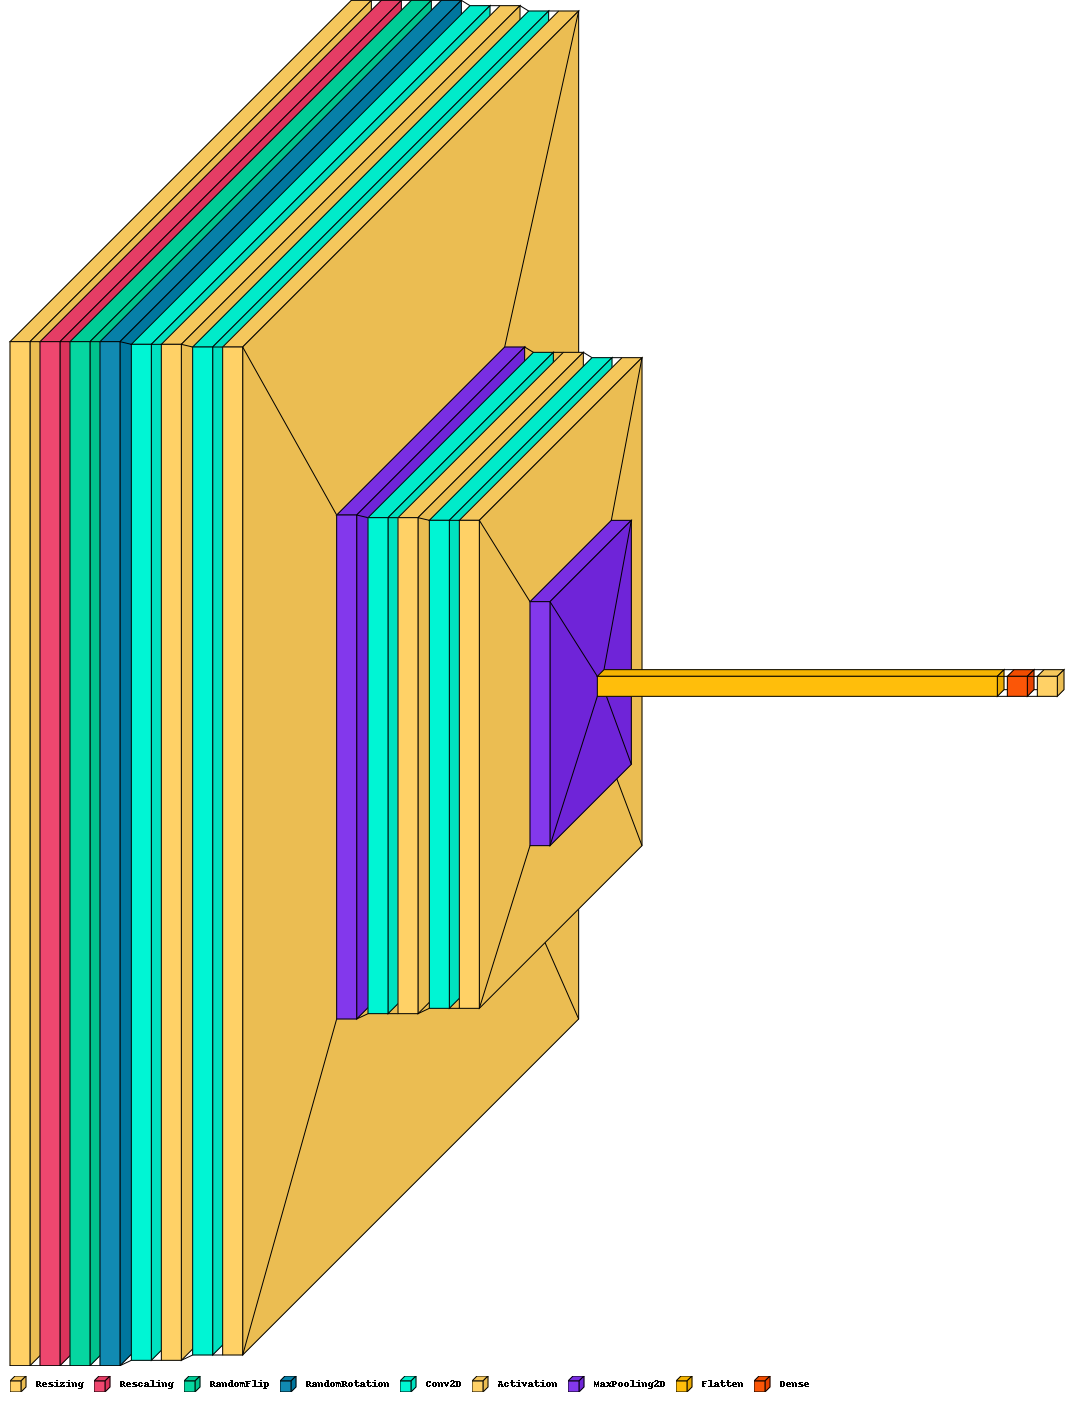

In [ ]:
import visualkeras
from tensorflow.keras import layers
from collections import defaultdict
color_map = defaultdict(dict)
color_map[layers.Conv2D]['fill'] = '#00f5d4'
color_map[layers.MaxPooling2D]['fill'] = '#8338ec'
color_map[layers.Dropout]['fill'] = '#03045e'
color_map[layers.Dense]['fill'] = '#fb5607'
color_map[layers.Flatten]['fill'] = '#ffbe0b'
visualkeras.layered_view(model4, legend=True, color_map=color_map)

In [ ]:
hist_df = pd.DataFrame(history4.history) 

In [ ]:
hist_csv_file = 'history4.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

# Model Evaluation

In [ ]:
import plotly.graph_objs as go
from plotly import subplots
import plotly
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def create_trace(x,y,ylabel,color):
  trace = go.Scatter(
      x = x, 
      y = y,
      name = ylabel,
      marker = dict(color =color),
      mode = "markers+lines",
      text = x
  )
  return trace

def plot_accuracy_and_loss(df):
  
  acc = df['accuracy']
  val_acc = df['val_accuracy']
  loss = df['loss']
  val_loss = df['val_loss']
  epochs = list(range(1,len(acc)+1))

  trace_ta = create_trace(epochs,acc,"Traning accuracy", "Green")
  trace_va = create_trace(epochs,val_acc,"Validation accuracy", "Red")
  trace_tl = create_trace(epochs,loss,"Training  loss", "Blue")
  trace_vl = create_trace(epochs,val_loss,"Validation loss", "Magenta")
  
  fig = subplots.make_subplots(rows=1, cols=2, subplot_titles=('Training and Validation accuracy','Training and Validation loss'))
  fig.append_trace(trace_ta,1,1)
  fig.append_trace(trace_va,1,1)
  fig.append_trace(trace_tl,1,2)
  fig.append_trace(trace_vl,1,2)
  fig['layout']['xaxis'].update(title = 'Epoch')
  fig['layout']['xaxis2'].update(title = 'Epoch')
  fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1])
  fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1])
  # fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1], autorange =True)
  # fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1], autorange =True)

  plotly.offline.iplot(fig, filename='accuracy-loss')

In [ ]:
print("Model4")
df = pd.read_csv('history4.csv')
# df
plot_accuracy_and_loss(df)

Model4


# Classification Report

In [ ]:
import pandas as pd

In [ ]:
metrics4 = pd.DataFrame(history4.history)

In [ ]:
print("Model4")
metrics4

Model4


,loss,accuracy,precision_m,recall_m,f1_m,val_loss,val_accuracy,val_precision_m,val_recall_m,val_f1_m
0,0.986415,0.586485,0.654408,0.426910,0.504304,0.839465,0.663265,0.703160,0.560268,0.622668
1,0.731932,0.718312,0.780751,0.640799,0.702892,0.761977,0.737245,0.775010,0.714286,0.742684
2,0.614968,0.763130,0.799957,0.717188,0.755966,0.759111,0.724490,0.736387,0.674107,0.703158
3,0.582722,0.782738,0.815025,0.736632,0.773406,0.664258,0.757653,0.748101,0.678571,0.711157
4,0.513803,0.804272,0.834173,0.771181,0.801219,0.690586,0.742347,0.796126,0.736607,0.764947
...,...,...,...,...,...,...,...,...,...,...
95,0.074308,0.973915,0.974628,0.973611,0.974115,0.258725,0.915816,0.930520,0.926339,0.928413
96,0.085316,0.972164,0.973393,0.971528,0.972452,0.309380,0.913265,0.923859,0.921875,0.922859
97,0.080189,0.969888,0.971470,0.969097,0.970271,0.305739,0.920918,0.917304,0.915179,0.916233
98,0.081503,0.973039,0.973917,0.971875,0.972887,0.157017,0.941327,0.933036,0.933036,0.933036


# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
true_labels = []
predicted_labels = []

for x, y in test_ds:
    true_labels.append(y)
    predicted_labels.append(model4.predict(x))
    
true_labels = np.concatenate(true_labels, axis=0)
predicted_labels = np.concatenate(predicted_labels, axis=0)

true_labels_list = []
predicted_labels_list = [] 

for (tr_lbl, pr_lbl) in zip (true_labels, predicted_labels):
    true_labels_list.append(np.argmax(tr_lbl))
    predicted_labels_list.append(np.argmax(pr_lbl))
    
true_labels_list = np.array(true_labels_list)
predicted_labels_list = np.array(predicted_labels_list)

print(true_labels_list)
print(predicted_labels_list)

cf_matrix = confusion_matrix(y_true=true_labels_list, y_pred=predicted_labels_list, normalize='pred')

1/1 [==============================] - 0s 108ms/step
[1 1 1 0 0 0 1 3 2 0 3 0 2 3 0 3 2 3 2 1 2 3 3 2 0 1 0 1 2 1 2 3 2 3 3 2 2
 3 1 1 1 0 0 0 3 0 1 2 1 3 0 2 2 2 2 0 2 2 2 1 2 1 2 3 3 1 0 3 3 0 0 2 3 0
 3 0 3 1 3 0 3 2 2 2 2 2 2 2 2 2 3 2 0 0 2 1 2 2 0 3 1 1 2 0 3 2 2 0 1 1 2
 0 0 0 2 0 2 3 1 2 0 0 1 2 1 1 1 0 2 1 1 2 3 3 2 0 0 1 0 2 3 2 0 2 3 1 0 0
 2 1 2 2 3 3 2 3 3 2 1 3 2 3 3 2 0 0 3 2 2 0 3 2 2 2 1 2 3 0 3 1 2 0 0 3 2
 2 2 3 0 2 1 3 2 3 2 2 2 1 2 1 3 2 1 0 3 2 0 0 2 0 3 3 3 0 3 3 2 3 3 2 1 2
 2 0 3 0 0 0 0 3 1 2 2 3 1 0 0 3 1 1 1 0 2 2 2 0 1 2 2 3 2 2 2 3 3 0 2 3 2
 2 2 2 0 3 2 1 0 1 0 2 0 3 1 0 1 2 2 0 1 1 3 0 3 3 2 1 1 1 2 2 1 1 1 1 3 2
 1 3 3 1 0 2 1 1 0 2 3 0 3 0 2 3 2 2 1 2 3 2 0 3 3 2 0 0 1 2 2 0 2 1 2 3 2
 3 2 3 2 0 3 2 0 0 3 0 3 3 1 3 3 3 1 2 2 0 0 0 3 1 3 3 1 3 0 0 2 0 1 0 2 1
 1 2 2 0 2 1 2 3 3 1 3 0 1 2 2 3 2 1 2 3 0 1 1 2 0 1 1 1 2 1 2 0 2 0 2 3 2
 0 2 0 0 1 2 0 2 0 3 2 1 1 0 1 1 3 2 0 0 1 0 2 3 1 0 3 2 0 0 0 2 3 0 1 2 2
 1 0 1 0 2 1 0 3 2 3 3 3 2 1 0 2 0 0 3 2 1 3 1 

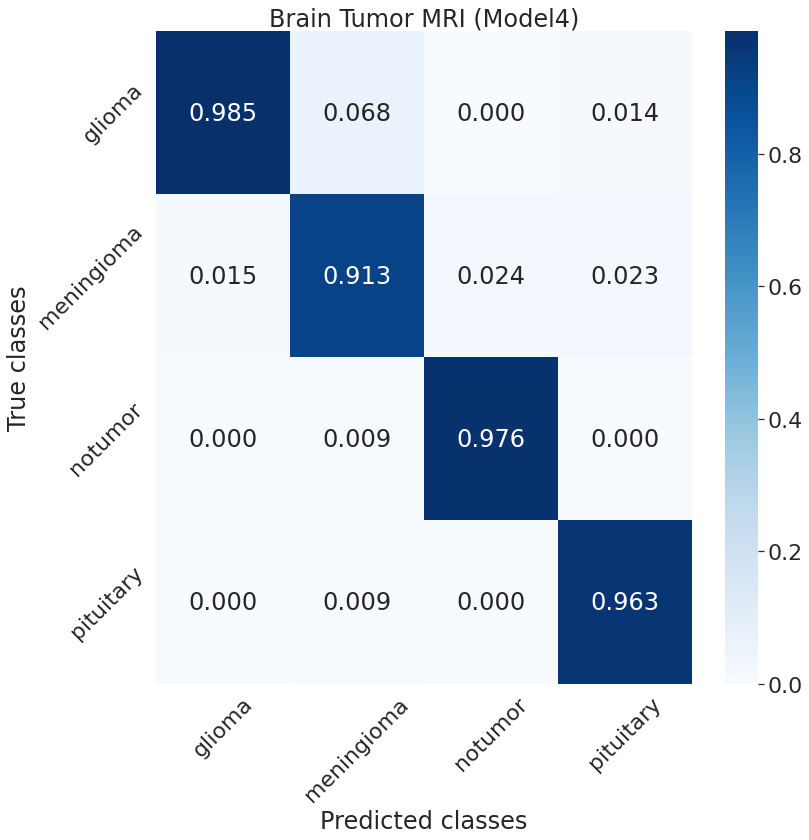

In [ ]:
#Confusion matrix of model from kaggle
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

plt.figure(figsize=(12,12))
sns.set(font_scale=2.0)
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='.3f')

plt.ylabel('True classes')
yticks, _ = plt.yticks()
plt.yticks(ticks=yticks, labels=labels, rotation=45)

plt.xlabel('Predicted classes')
xticks, _ = plt.xticks()
plt.xticks(ticks=xticks, labels=labels, rotation=45)

plt.title('Brain Tumor MRI (Model4)')

plt.show()